## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  44.064956   980.972573  0.668712   7.610005  1.135529
1  72.562412  1099.495930  0.533809  10.210236  1.586222
2  24.060301   770.137298  0.511666   8.377305  1.665266
3  77.143729  1144.638899  0.148727   5.409466  1.190859
4  54.438782  1291.950090  0.757989   3.728634  1.484127


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9334152	total: 53.2ms	remaining: 53.2s
1:	learn: 0.9257967	total: 54.3ms	remaining: 27.1s
2:	learn: 0.9178453	total: 55ms	remaining: 18.3s
3:	learn: 0.9094898	total: 55.8ms	remaining: 13.9s
4:	learn: 0.9020163	total: 56.5ms	remaining: 11.2s
5:	learn: 0.8939812	total: 57.5ms	remaining: 9.52s
6:	learn: 0.8856738	total: 58.3ms	remaining: 8.27s
7:	learn: 0.8762014	total: 59.6ms	remaining: 7.39s
8:	learn: 0.8682219	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8576115	total: 62ms	remaining: 6.14s
10:	learn: 0.8503768	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8410389	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8338323	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8254838	total: 65.6ms	remaining: 4.62s
14:	learn: 0.8150959	total: 66.2ms	remaining: 4.34s
15:	learn: 0.8051349	total: 69.9ms	remaining: 4.3s
16:	learn: 0.7987915	total: 70.7ms	remaining: 4.09s
17:	learn: 0.7923764	total: 71.5ms	remaining: 3.9s
18:	learn: 0.7846498	total: 75.6ms	remaining: 3.9s
19:	learn: 0.7764389	total: 7

107:	learn: 0.3877171	total: 174ms	remaining: 1.44s
108:	learn: 0.3846929	total: 175ms	remaining: 1.43s
109:	learn: 0.3819987	total: 176ms	remaining: 1.42s
110:	learn: 0.3791009	total: 176ms	remaining: 1.41s
111:	learn: 0.3770314	total: 177ms	remaining: 1.4s
112:	learn: 0.3747864	total: 177ms	remaining: 1.39s
113:	learn: 0.3724501	total: 178ms	remaining: 1.38s
114:	learn: 0.3699493	total: 179ms	remaining: 1.38s
115:	learn: 0.3679385	total: 179ms	remaining: 1.37s
116:	learn: 0.3651733	total: 180ms	remaining: 1.36s
117:	learn: 0.3623143	total: 181ms	remaining: 1.35s
118:	learn: 0.3606667	total: 181ms	remaining: 1.34s
119:	learn: 0.3587149	total: 182ms	remaining: 1.33s
120:	learn: 0.3563320	total: 182ms	remaining: 1.32s
121:	learn: 0.3544168	total: 183ms	remaining: 1.32s
122:	learn: 0.3520278	total: 184ms	remaining: 1.31s
123:	learn: 0.3504772	total: 184ms	remaining: 1.3s
124:	learn: 0.3477043	total: 184ms	remaining: 1.29s
125:	learn: 0.3451159	total: 185ms	remaining: 1.28s
126:	learn: 0.

149:	learn: 0.2975808	total: 203ms	remaining: 1.15s
150:	learn: 0.2959008	total: 205ms	remaining: 1.15s
151:	learn: 0.2940154	total: 206ms	remaining: 1.15s
152:	learn: 0.2920898	total: 208ms	remaining: 1.15s
153:	learn: 0.2906702	total: 209ms	remaining: 1.15s
154:	learn: 0.2890428	total: 210ms	remaining: 1.15s
155:	learn: 0.2872475	total: 213ms	remaining: 1.15s
156:	learn: 0.2855505	total: 214ms	remaining: 1.15s
157:	learn: 0.2839425	total: 215ms	remaining: 1.14s
158:	learn: 0.2823570	total: 215ms	remaining: 1.14s
159:	learn: 0.2800769	total: 216ms	remaining: 1.13s
160:	learn: 0.2789110	total: 216ms	remaining: 1.13s
161:	learn: 0.2775865	total: 217ms	remaining: 1.12s
162:	learn: 0.2763652	total: 217ms	remaining: 1.12s
163:	learn: 0.2743607	total: 219ms	remaining: 1.11s
164:	learn: 0.2727601	total: 221ms	remaining: 1.12s
165:	learn: 0.2714863	total: 222ms	remaining: 1.12s
166:	learn: 0.2699272	total: 224ms	remaining: 1.11s
167:	learn: 0.2687535	total: 225ms	remaining: 1.11s
168:	learn: 

255:	learn: 0.1657195	total: 326ms	remaining: 946ms
256:	learn: 0.1647418	total: 327ms	remaining: 945ms
257:	learn: 0.1639507	total: 328ms	remaining: 944ms
258:	learn: 0.1631792	total: 329ms	remaining: 942ms
259:	learn: 0.1623380	total: 330ms	remaining: 939ms
260:	learn: 0.1616872	total: 331ms	remaining: 936ms
261:	learn: 0.1607593	total: 331ms	remaining: 933ms
262:	learn: 0.1600985	total: 332ms	remaining: 929ms
263:	learn: 0.1592399	total: 333ms	remaining: 927ms
264:	learn: 0.1582690	total: 333ms	remaining: 924ms
265:	learn: 0.1574639	total: 334ms	remaining: 922ms
266:	learn: 0.1568407	total: 335ms	remaining: 919ms
267:	learn: 0.1561892	total: 335ms	remaining: 916ms
268:	learn: 0.1553660	total: 336ms	remaining: 912ms
269:	learn: 0.1544826	total: 336ms	remaining: 909ms
270:	learn: 0.1535767	total: 337ms	remaining: 906ms
271:	learn: 0.1527597	total: 337ms	remaining: 903ms
272:	learn: 0.1521481	total: 338ms	remaining: 900ms
273:	learn: 0.1511822	total: 339ms	remaining: 897ms
274:	learn: 

292:	learn: 0.1385244	total: 354ms	remaining: 853ms
293:	learn: 0.1380974	total: 356ms	remaining: 856ms
294:	learn: 0.1374996	total: 357ms	remaining: 854ms
295:	learn: 0.1368048	total: 358ms	remaining: 851ms
296:	learn: 0.1362248	total: 359ms	remaining: 849ms
297:	learn: 0.1355668	total: 360ms	remaining: 848ms
298:	learn: 0.1350680	total: 361ms	remaining: 846ms
299:	learn: 0.1346734	total: 361ms	remaining: 843ms
300:	learn: 0.1340157	total: 362ms	remaining: 841ms
301:	learn: 0.1336329	total: 363ms	remaining: 839ms
302:	learn: 0.1330364	total: 366ms	remaining: 842ms
303:	learn: 0.1324010	total: 367ms	remaining: 839ms
304:	learn: 0.1318583	total: 367ms	remaining: 837ms
305:	learn: 0.1312278	total: 368ms	remaining: 835ms
306:	learn: 0.1306978	total: 370ms	remaining: 834ms
307:	learn: 0.1303310	total: 371ms	remaining: 833ms
308:	learn: 0.1300423	total: 371ms	remaining: 831ms
309:	learn: 0.1296802	total: 372ms	remaining: 829ms
310:	learn: 0.1291875	total: 373ms	remaining: 827ms
311:	learn: 

417:	learn: 0.0911156	total: 476ms	remaining: 662ms
418:	learn: 0.0909396	total: 478ms	remaining: 662ms
419:	learn: 0.0908216	total: 480ms	remaining: 663ms
420:	learn: 0.0906814	total: 482ms	remaining: 662ms
421:	learn: 0.0905037	total: 483ms	remaining: 661ms
422:	learn: 0.0903884	total: 484ms	remaining: 660ms
423:	learn: 0.0902342	total: 484ms	remaining: 658ms
424:	learn: 0.0900423	total: 485ms	remaining: 656ms
425:	learn: 0.0898750	total: 486ms	remaining: 655ms
426:	learn: 0.0897641	total: 487ms	remaining: 654ms
427:	learn: 0.0896000	total: 489ms	remaining: 653ms
428:	learn: 0.0892461	total: 490ms	remaining: 653ms
429:	learn: 0.0890747	total: 491ms	remaining: 651ms
430:	learn: 0.0889453	total: 493ms	remaining: 651ms
431:	learn: 0.0888177	total: 494ms	remaining: 649ms
432:	learn: 0.0886869	total: 496ms	remaining: 650ms


433:	learn: 0.0883426	total: 509ms	remaining: 663ms
434:	learn: 0.0881988	total: 510ms	remaining: 662ms
435:	learn: 0.0880574	total: 511ms	remaining: 661ms
436:	learn: 0.0879531	total: 512ms	remaining: 660ms
437:	learn: 0.0877996	total: 513ms	remaining: 659ms
438:	learn: 0.0876821	total: 514ms	remaining: 657ms
439:	learn: 0.0875669	total: 515ms	remaining: 656ms
440:	learn: 0.0874542	total: 519ms	remaining: 658ms
441:	learn: 0.0873490	total: 521ms	remaining: 657ms
442:	learn: 0.0870026	total: 522ms	remaining: 656ms
443:	learn: 0.0866740	total: 522ms	remaining: 654ms
444:	learn: 0.0865649	total: 523ms	remaining: 653ms
445:	learn: 0.0864581	total: 525ms	remaining: 652ms
446:	learn: 0.0863558	total: 526ms	remaining: 651ms
447:	learn: 0.0862549	total: 528ms	remaining: 650ms
448:	learn: 0.0859165	total: 529ms	remaining: 649ms
449:	learn: 0.0855834	total: 530ms	remaining: 648ms
450:	learn: 0.0852698	total: 531ms	remaining: 647ms
451:	learn: 0.0847710	total: 533ms	remaining: 646ms
452:	learn: 

547:	learn: 0.0589553	total: 631ms	remaining: 520ms
548:	learn: 0.0586321	total: 632ms	remaining: 519ms
549:	learn: 0.0584072	total: 632ms	remaining: 517ms
550:	learn: 0.0582617	total: 633ms	remaining: 516ms
551:	learn: 0.0581207	total: 634ms	remaining: 514ms
552:	learn: 0.0579457	total: 634ms	remaining: 513ms
553:	learn: 0.0577737	total: 635ms	remaining: 511ms
554:	learn: 0.0576046	total: 636ms	remaining: 510ms
555:	learn: 0.0574383	total: 636ms	remaining: 508ms
556:	learn: 0.0572846	total: 637ms	remaining: 507ms
557:	learn: 0.0571236	total: 637ms	remaining: 505ms
558:	learn: 0.0569747	total: 638ms	remaining: 503ms
559:	learn: 0.0568129	total: 639ms	remaining: 502ms
560:	learn: 0.0566533	total: 639ms	remaining: 500ms
561:	learn: 0.0565000	total: 640ms	remaining: 499ms
562:	learn: 0.0563492	total: 641ms	remaining: 497ms
563:	learn: 0.0561945	total: 641ms	remaining: 496ms
564:	learn: 0.0560474	total: 642ms	remaining: 494ms
565:	learn: 0.0559509	total: 642ms	remaining: 492ms
566:	learn: 

584:	learn: 0.0533450	total: 662ms	remaining: 469ms
585:	learn: 0.0531054	total: 663ms	remaining: 468ms
586:	learn: 0.0529564	total: 664ms	remaining: 467ms
587:	learn: 0.0527698	total: 665ms	remaining: 466ms
588:	learn: 0.0525372	total: 666ms	remaining: 465ms
589:	learn: 0.0524312	total: 667ms	remaining: 463ms
590:	learn: 0.0522412	total: 673ms	remaining: 466ms
591:	learn: 0.0520163	total: 674ms	remaining: 465ms
592:	learn: 0.0518312	total: 678ms	remaining: 465ms
593:	learn: 0.0516491	total: 679ms	remaining: 464ms
594:	learn: 0.0514776	total: 681ms	remaining: 464ms
595:	learn: 0.0513923	total: 682ms	remaining: 462ms
596:	learn: 0.0513083	total: 683ms	remaining: 461ms
597:	learn: 0.0512023	total: 684ms	remaining: 460ms
598:	learn: 0.0510997	total: 684ms	remaining: 458ms
599:	learn: 0.0510052	total: 685ms	remaining: 457ms
600:	learn: 0.0509663	total: 686ms	remaining: 455ms
601:	learn: 0.0508967	total: 686ms	remaining: 454ms
602:	learn: 0.0508585	total: 687ms	remaining: 452ms
603:	learn: 

709:	learn: 0.0389534	total: 786ms	remaining: 321ms
710:	learn: 0.0388450	total: 787ms	remaining: 320ms
711:	learn: 0.0386556	total: 788ms	remaining: 319ms
712:	learn: 0.0384555	total: 789ms	remaining: 318ms
713:	learn: 0.0383497	total: 790ms	remaining: 316ms
714:	learn: 0.0383150	total: 790ms	remaining: 315ms
715:	learn: 0.0381127	total: 791ms	remaining: 314ms
716:	learn: 0.0380786	total: 792ms	remaining: 312ms
717:	learn: 0.0379755	total: 792ms	remaining: 311ms
718:	learn: 0.0377326	total: 793ms	remaining: 310ms
719:	learn: 0.0376323	total: 794ms	remaining: 309ms
720:	learn: 0.0374331	total: 797ms	remaining: 308ms
721:	learn: 0.0373625	total: 798ms	remaining: 307ms
722:	learn: 0.0371878	total: 798ms	remaining: 306ms
723:	learn: 0.0371191	total: 799ms	remaining: 305ms
724:	learn: 0.0369285	total: 800ms	remaining: 303ms
725:	learn: 0.0368614	total: 800ms	remaining: 302ms
726:	learn: 0.0367682	total: 801ms	remaining: 301ms
727:	learn: 0.0365826	total: 802ms	remaining: 300ms
728:	learn: 

739:	learn: 0.0349439	total: 818ms	remaining: 287ms
740:	learn: 0.0347591	total: 821ms	remaining: 287ms
741:	learn: 0.0346636	total: 822ms	remaining: 286ms
742:	learn: 0.0345700	total: 823ms	remaining: 285ms
743:	learn: 0.0344198	total: 824ms	remaining: 283ms
744:	learn: 0.0343281	total: 824ms	remaining: 282ms
745:	learn: 0.0342704	total: 825ms	remaining: 281ms
746:	learn: 0.0341221	total: 826ms	remaining: 280ms
747:	learn: 0.0340654	total: 826ms	remaining: 278ms
748:	learn: 0.0340097	total: 827ms	remaining: 277ms
749:	learn: 0.0338908	total: 828ms	remaining: 276ms
750:	learn: 0.0336914	total: 828ms	remaining: 275ms
751:	learn: 0.0336024	total: 829ms	remaining: 273ms
752:	learn: 0.0334088	total: 830ms	remaining: 272ms
753:	learn: 0.0332897	total: 831ms	remaining: 271ms
754:	learn: 0.0331145	total: 831ms	remaining: 270ms
755:	learn: 0.0330570	total: 832ms	remaining: 269ms
756:	learn: 0.0330006	total: 833ms	remaining: 267ms
757:	learn: 0.0328154	total: 834ms	remaining: 266ms
758:	learn: 

866:	learn: 0.0247566	total: 943ms	remaining: 145ms
867:	learn: 0.0246791	total: 943ms	remaining: 143ms
868:	learn: 0.0246034	total: 944ms	remaining: 142ms
869:	learn: 0.0245259	total: 945ms	remaining: 141ms
870:	learn: 0.0244210	total: 945ms	remaining: 140ms
871:	learn: 0.0243453	total: 946ms	remaining: 139ms
872:	learn: 0.0242351	total: 947ms	remaining: 138ms
873:	learn: 0.0241613	total: 948ms	remaining: 137ms
874:	learn: 0.0239843	total: 949ms	remaining: 136ms
875:	learn: 0.0239111	total: 951ms	remaining: 135ms
876:	learn: 0.0238394	total: 951ms	remaining: 133ms
877:	learn: 0.0236675	total: 953ms	remaining: 132ms
878:	learn: 0.0235979	total: 954ms	remaining: 131ms
879:	learn: 0.0235695	total: 955ms	remaining: 130ms
880:	learn: 0.0234023	total: 955ms	remaining: 129ms
881:	learn: 0.0233648	total: 957ms	remaining: 128ms
882:	learn: 0.0233370	total: 958ms	remaining: 127ms
883:	learn: 0.0232193	total: 959ms	remaining: 126ms
884:	learn: 0.0231793	total: 959ms	remaining: 125ms
885:	learn: 

898:	learn: 0.0223530	total: 973ms	remaining: 109ms
899:	learn: 0.0223271	total: 974ms	remaining: 108ms
900:	learn: 0.0222599	total: 975ms	remaining: 107ms
901:	learn: 0.0221484	total: 976ms	remaining: 106ms
902:	learn: 0.0221130	total: 977ms	remaining: 105ms
903:	learn: 0.0220595	total: 978ms	remaining: 104ms
904:	learn: 0.0219693	total: 979ms	remaining: 103ms
905:	learn: 0.0219373	total: 980ms	remaining: 102ms
906:	learn: 0.0218306	total: 981ms	remaining: 101ms
907:	learn: 0.0217993	total: 983ms	remaining: 99.6ms
908:	learn: 0.0217682	total: 984ms	remaining: 98.5ms
909:	learn: 0.0216602	total: 985ms	remaining: 97.4ms
910:	learn: 0.0216270	total: 986ms	remaining: 96.3ms
911:	learn: 0.0215214	total: 986ms	remaining: 95.2ms
912:	learn: 0.0214227	total: 987ms	remaining: 94ms
913:	learn: 0.0213715	total: 987ms	remaining: 92.9ms
914:	learn: 0.0212686	total: 988ms	remaining: 91.8ms
915:	learn: 0.0211728	total: 989ms	remaining: 90.7ms
916:	learn: 0.0211231	total: 990ms	remaining: 89.6ms
917:

999:	learn: 0.0167316	total: 1.07s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5146121357039496


ABC Pre-generator MAE 0.7723245911914456


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

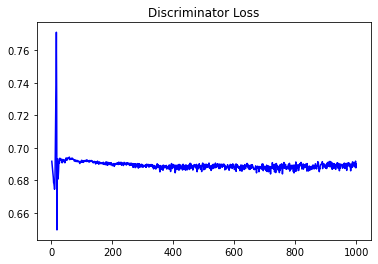

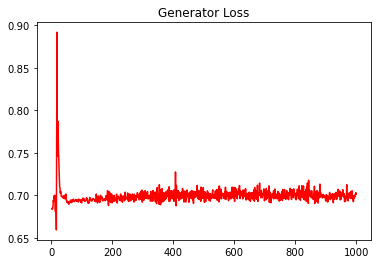

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3771281704166904


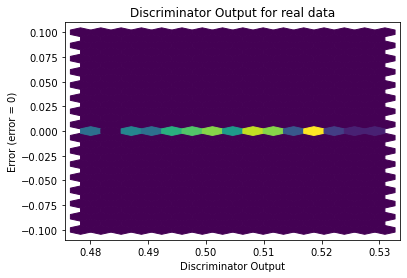

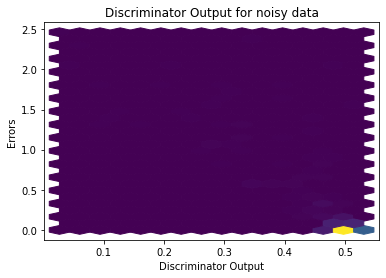

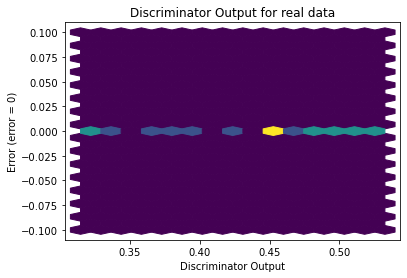

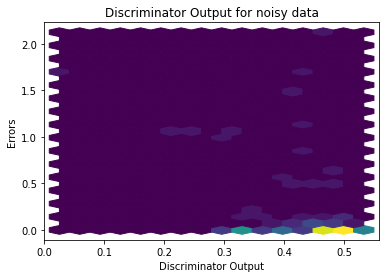

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

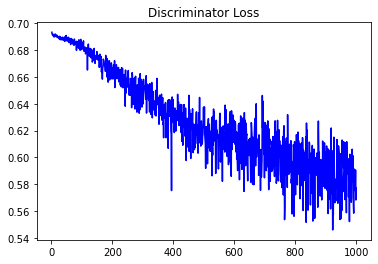

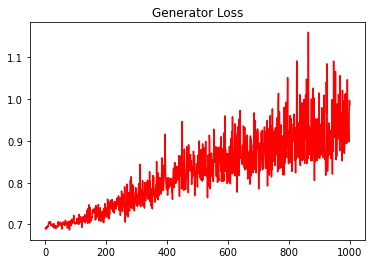

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5993043580278754


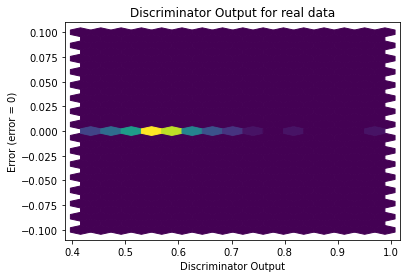

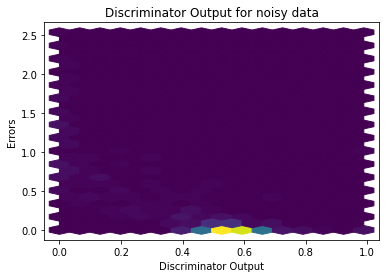

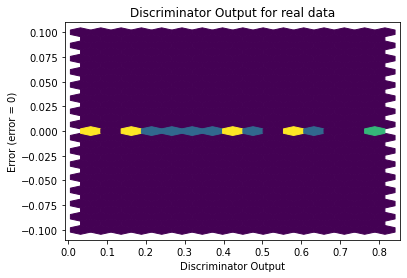

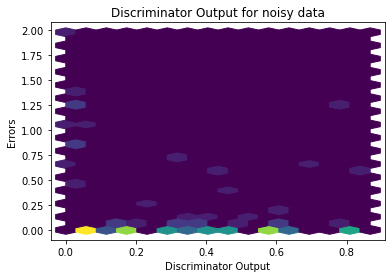

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


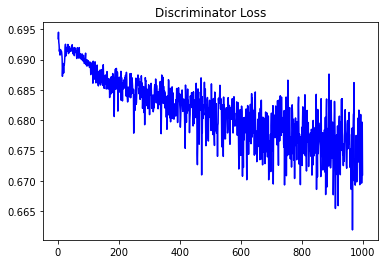

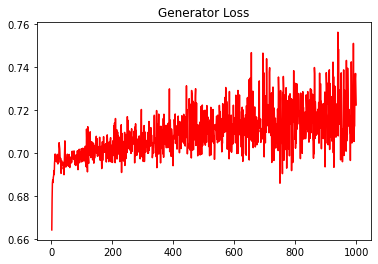

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4761896820887923


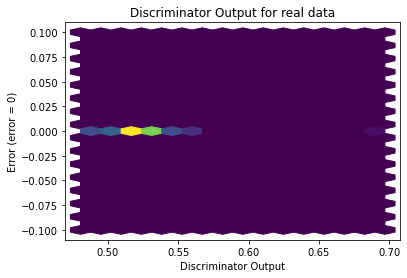

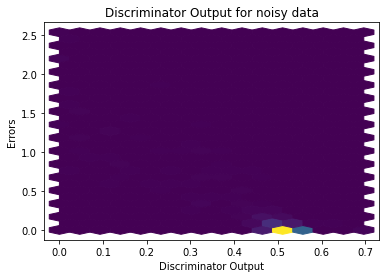

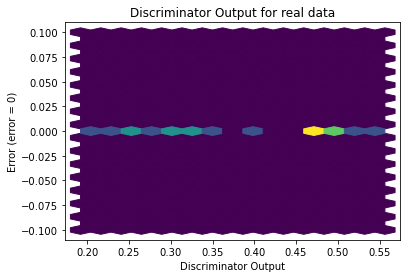

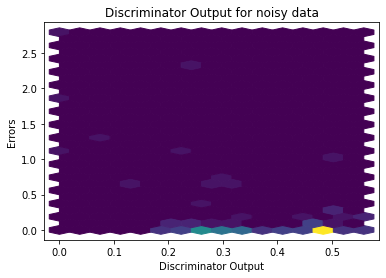

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


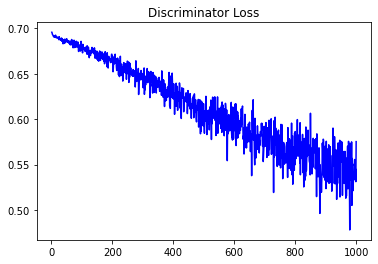

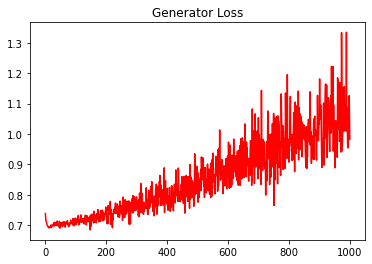

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5991155653400346


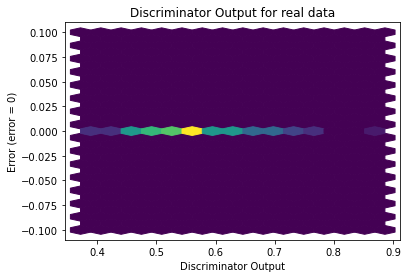

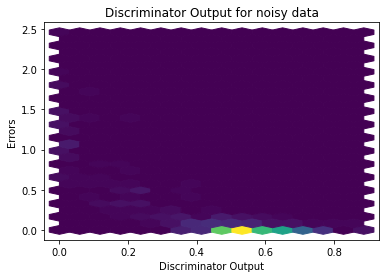

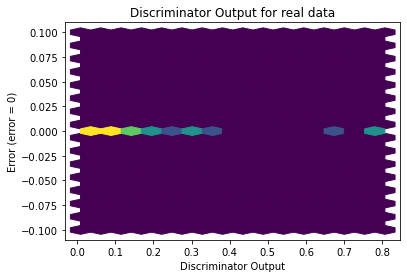

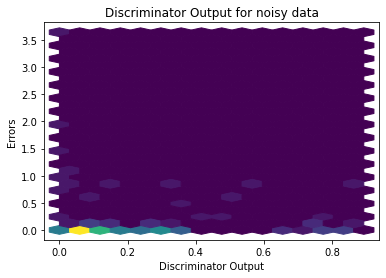

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5819]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8600]], requires_grad=True)
